In [ ]:
# Importing Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image


In [22]:
#Data loading 
train_dir = r'/kaggle/input/ml-project-dataset/dataset/training_set'
test_dir = r'/kaggle/input/ml-project-dataset/dataset/test_set'
single_pred_dir = r'/kaggle/input/ml-project-dataset/dataset/single_prediction'

In [23]:
#Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(64, 64), batch_size=32, class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [24]:
#Building CNN
cnn = Sequential()

In [ ]:
#Convolution
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))

In [ ]:
#Pooling
cnn.add(MaxPooling2D(pool_size=2, strides=2))

In [29]:
#Adding a second convolution layer
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

In [30]:
#Flattening
cnn.add(Flatten())

In [31]:
#Full connection
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dropout(0.5))  # Prevent overfitting
cnn.add(Dense(units=1, activation='sigmoid'))

In [32]:
#Compiling the CNN
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
#Training the CNN on Training set and evaluating on Test set
history = cnn.fit(x=train_generator, validation_data=test_generator, epochs=25)

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 92s 364ms/step - accuracy: 0.6048 - loss: 0.6673 - val_accuracy: 0.5825 - val_loss: 0.7081
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 91s 361ms/step - accuracy: 0.6599 - loss: 0.6155 - val_accuracy: 0.7350 - val_loss: 0.5439
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 91s 360ms/step - accuracy: 0.7182 - loss: 0.5591 - val_accuracy: 0.7450 - val_loss: 0.5112
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 90s 357ms/step - accuracy: 0.7343 - loss: 0.5266 - val_accuracy: 0.7500 - val_loss: 0.4993
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 89s 353ms/step - accuracy: 0.7649 - loss: 0.4953 - val_accuracy: 0.7745 - val_loss: 0.4676
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 92s 366ms/step - accuracy: 0.7873 - loss: 0.4613 - val_accuracy: 0.7715 - val_loss: 0.4641
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 93s 368ms/step - accuracy: 0.7868 - loss: 0.4422 - val_accuracy: 0.7795 - val_loss: 0.4539
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 89s 354ms/step - accuracy: 0.8042 - loss: 0

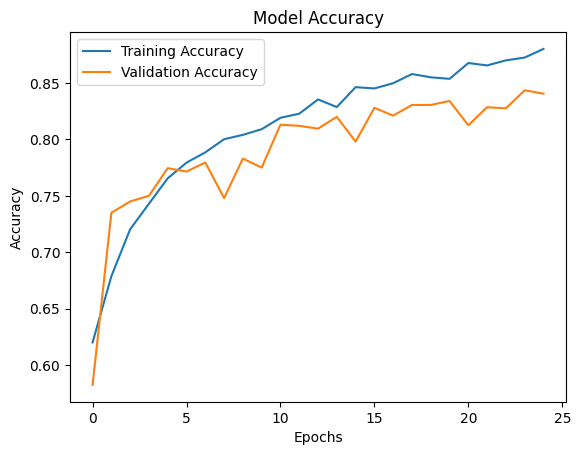

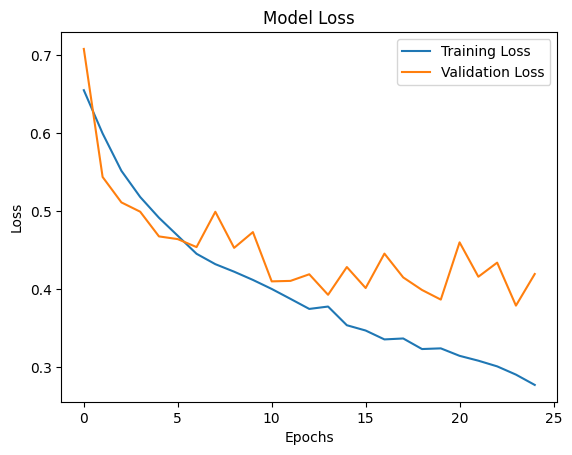

In [39]:
#Making a single prediction

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
def predict_image(image_path):
    test_image = image.load_img(image_path, target_size=(64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    test_image /= 255.0  # Rescale

    prediction = cnn.predict(test_image)
    if prediction[0][0] >= 0.5:
        print("Prediction: Dog")
    else:
        print("Prediction: Cat")


predict_image('/kaggle/input/ml-project-dataset/dataset/single_prediction/cat_or_dog_2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: Cat


In [ ]:
Github link: https://github.com/Dhvani173/CNN-Image-Classification

Medium link: https://medium.com/@dhvanipatel234/building-a-convolutional-neural-network-to-classify-cats-and-dogs-7f4c00345d3d